In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy as sp
from scipy import stats

In [2]:
data_df = pd.read_csv('기초 데이터.csv')

data_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,연령,성별,학력,소득,지역,시군,동읍면,접근,역량,활용,WT,점수,연령_cut
0,0,0,0,11053,52,2,2,1,1,1,1,100,21.428571,32.820513,1.00,41.699634,10
1,1,1,1,16026,50,2,2,2,14,2,2,75,21.428571,52.051282,1.00,44.391941,10
2,2,2,2,16346,49,2,4,1,15,1,1,75,50.000000,37.820513,1.00,50.128205,9
3,3,3,3,10734,22,2,3,2,1,1,1,75,50.000000,65.128205,1.02,62.272308,4
4,4,4,4,14340,35,2,3,2,9,1,1,100,64.285714,57.051282,1.01,69.220147,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,6995,6995,15959,89,1,1,1,14,2,2,0,0.000000,0.000000,0.94,0.000000,11
6996,6996,6996,6996,14859,90,2,1,7,9,1,1,75,0.000000,0.000000,0.99,14.850000,11
6997,6997,6997,6997,12318,92,1,1,2,4,1,1,75,0.000000,0.000000,0.93,13.950000,11
6998,6998,6998,6998,15074,93,2,1,1,10,2,2,0,0.000000,0.000000,0.95,0.000000,11


### 학력과 점수 간 상관관계

In [6]:
data_학력_df = data_df[['학력','점수']]
data_학력_df.head()

# 학력 , 0: 무응답, 1: 초졸이하, 2: 중졸, 고등학교 중퇴포함, 3: 고졸, 대학교 중퇴포함, 4: 대졸이상, 전문대 포함

,학력,점수
0,2,41.699634
1,2,44.391941
2,4,50.128205
3,3,62.272308
4,3,69.220147


In [7]:
how_many_학력_df = pd.DataFrame(data_학력_df['학력'].value_counts())

how_many_학력_df

,학력
3,2889
4,2204
2,1059
1,848


<AxesSubplot:>

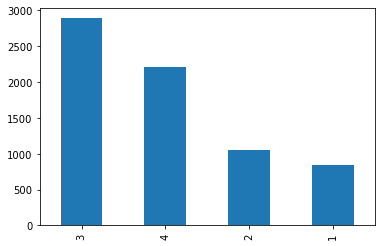

In [8]:
how_many_학력_df['학력'].plot(kind="bar")

In [9]:
pd.crosstab(data_학력_df['점수'], data_학력_df['학력'], margins=True)

학력,1,2,3,4,All
점수,,,,,
0.0,28,21,9,1,59
2.7142857142857144,1,0,0,0,1
2.8,0,1,0,0,1
4.8,0,2,0,0,2
4.85,1,3,0,0,4
...,...,...,...,...,...
111.2,0,0,0,1,1
112.12307692307692,0,0,0,1,1
130.9230769230769,0,0,1,0,1


귀무가설:학력과 정보화 수준 점수는 관련이 없다.
대립가설:학력과 정보화 수준 점수는 관련이 있다.

In [10]:
stats.chisquare(data_학력_df['학력'], data_학력_df['점수'])

# Pvalue = 0.0이므로 귀무가설 기각, 대립가설 채택

C:\Users\mycom123\Anaconda3\lib\site-packages\scipy\stats\stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [11]:
stats.chisquare(data_학력_df['점수'], data_학력_df['학력'])

# 변수 간 선후관계를 바꿔봐도 Pvalue = 0.0이므로 귀무가설 기각, 대립가설 채택

Power_divergenceResult(statistic=12031969.397693038, pvalue=0.0)

### 변수 간 상관관계 파악

In [12]:
data_학력_df.corr()

# -1에 가까울수록 음의 상관관계, 1에 가까울수록 양의 상관관계, 0에 가까울수록 상관관계가 적음
# 보통 상관계수가 0.7보다 클 경우 강한 양의 상관관계가, -0.7보다 작을 경우 강한 음의 상관관계(하나가 증가할 경우 다른 하나는 감소한다)가 있다고 판단함.

,학력,점수
학력,1.00000,0.50903
점수,0.50903,1.00000


### 결론 : 학력이 높을수록 정보화 수준 점수도 높음

Text(0.5, 1.0, '학력과 정보화 점수 간 상관관계')

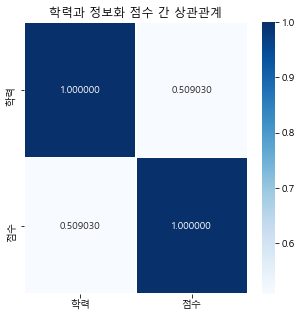

In [15]:
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False # 범주에 - 표시
plt.figure(figsize=(5,5))
sns.heatmap(data = data_학력_df.corr(), annot=True, 
fmt = 'f', linewidths=.5, cmap='Blues')
plt.title('학력과 정보화 점수 간 상관관계')